# Introduction to Regression with neural netrowks in Tensor FLow

There are many definitions for a regression problem but in our case we are going to keep it simple : Predicting a numerical variable based on other variables even shorter prediting a number.


In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


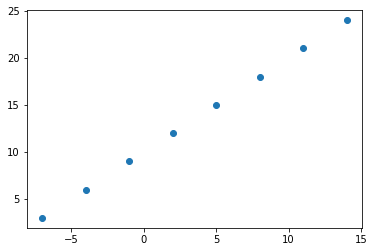

In [3]:
## Creating some data to view and fit
import numpy as np 
import matplotlib.pyplot as plt
# Creating features
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualise it
plt.scatter(x,y);

In [4]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# This is the relation between our inputs and outputs


### Lets Check out our input and output shape

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = x.shape
output_shape  = y.shape
input_shape,output_shape

((8,), (8,))

In [8]:
# Turn our numpy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Step in modeling with tensor flow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function - the function that tells our function how wrong it is and optimizer that tells our function how to improve itself and evaluation metrics that tells how well is the performance of our model
3. **Fitting a model** - letting the model try to find patterns betwqeen x and y

In [10]:
# Set Randdom Seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.mae,# mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 551ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred +11

1/1 [==============================] - 0s 80ms/step


array([[23.71602]], dtype=float32)

## Improving Our Model

We can improve our model by altering steps to crete the model

1. **Creating the model** - we might add more layers, increase the number of hidden units (all called neurons) wihtin each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the ** Learning rate** oof the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (given more eaxamples to learn on)

In [13]:
# Lets re build our model 

#1. to Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 Compile the mdoel
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 277ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

In [14]:
# Remind our selfs of data 
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Lets see if our models presdiction has improved
model.predict([17.0])

1/1 [==============================] - 0s 117ms/step


array([[29.739855]], dtype=float32)

In [16]:
# Creating the model again with another change
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# Compiling our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)

# Now fit the model
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 332ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7706 - ma

In [17]:
# Remindr of what x and y was
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 229ms/step


array([[27.497076]], dtype=float32)

In [19]:
# Creating the model again with another change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# Now fit the model
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 654ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0

In [20]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 202ms/step


array([[31.727648]], dtype=float32)

In [22]:
# Creating the model again with another change
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# Compiling our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)

# Now fit the model
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 752ms/step - loss: 7.9432 - mae: 7.9432
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4932 - mae: 7.4932
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3500 - mae: 7.3500
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 7.2763 - mae: 7.2763
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3549 - mae: 7.3549
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3635 - mae: 7.3635
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.2977 - mae: 7.2977
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1808 - mae: 7.1808
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.0267 - mae: 7.0267
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8616 - mae: 6.8616
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 187ms/step


array([[26.921104]], dtype=float32)

## Evaluating Model

In practice  a typical work flow you go through is

Build amodel -> fit it -> evaluate it -> tweal a model -> fit it -> evaluate it

When it comes to evaluating there are 3 words you should memorize:
   " Visualize,visualize,visualize"
it's good idea to visualize:
   * The data - what data we are working with? What does it look like?
   * The model itself - what does our model looks like ?
   * The Training of a model - how does a model perfoms while it learns
   * The prediction of a model - how do the prediction of a model line up against the ground truth (The orignal labels)?

In [24]:
# Make a biger data set
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

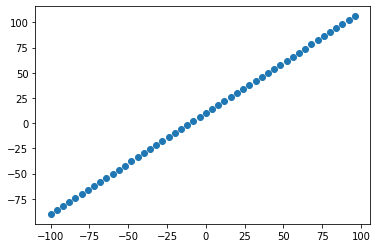

In [26]:
# Visualize the data 
plt.scatter(x,y);

### The 3 sets ....

* Training set - the model learns from this data and it is typicaly 70-80 percent of data.
* Validation set - the model gets tunned on this data which is typically 10 to 15 % of total data
* Test set - The model is evaluated usingf this data

In [27]:
# Check the leanght of how many samples we have
len(x)

50

In [28]:
# Split the data into train and test sets
x_train = x[:40] 
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]
len(x_train),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing our data
Now lets visualize the sets

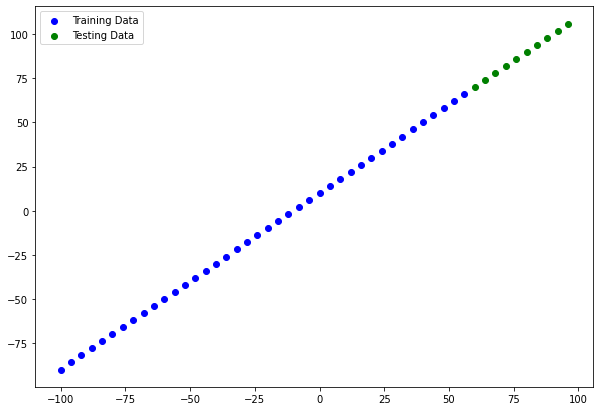

In [29]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(x_train,y_train,c="b",label="Training Data")
plt.scatter(x_test,y_test,c="g",label="Testing Data")
plt.legend()
plt.show()

In [30]:
# Lets have a look at how to build a neural network for our data

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the model
# model.fit(x_train,y_train,epochs=100)

### Visualizing the model

In [31]:
# Lets create a model that builds automatically by defining the input shape
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,input_shape=[10],name="output_layer")
],name="One_of_many_models_we_are_going_to_create")
# 2 compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [32]:
model.summary()

Model: "One_of_many_models_we_are_going_to_create"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total parameters our model is going to learn
* Trainable Pramater 2 means all the parameters in the model are trainable
* Non-Trainable prams these parameters are not trainable 

In [33]:
# Lets fit our model to the trianing data
model.fit(x_train,y_train,epochs=100,verbose=0)

In [34]:
model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[21.23416]], dtype=float32)

In [35]:
import numpy as np
a=np.array([1,2,2])

In [36]:
a.ndim

1

In [37]:
# Call a summary of opur model
model.summary()

Model: "One_of_many_models_we_are_going_to_create"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.utils import plot_model

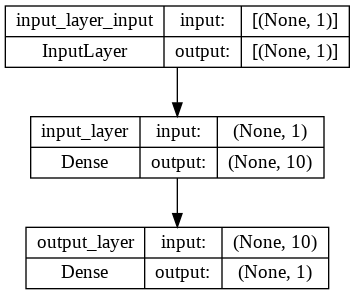

In [39]:
plot_model(model=model,show_shapes=True)

### Visualizing our model predictions
To visualze predictions it is good to plot them against ground trith values

In [40]:
# Make some predictions
y_preds = model.predict(x_test)
y_preds

1/1 [==============================] - 0s 71ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
# Lets create a plotting function

def plot_predictions(train_data = x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds):
  plt.figure(figsize=(10,7))
  # Plot training data in blue 
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  # plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testig Data")
  # Plot model pridiction in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()

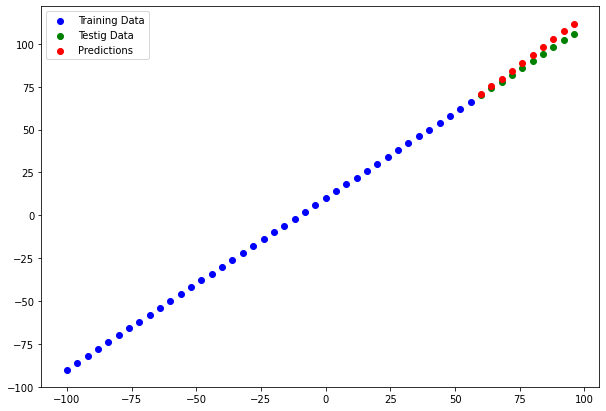

In [43]:
plot_predictions()

### Evaluating our model prediction with regression evaluation metrics

Depending on the problem you are working on there will be different evaluation model to evaluate your models however the most common ones are 
* MAE How wrong our predictions are on average
* MSE When larger errors are more significant than   smaller errors
* HUBER

In [44]:
# Evaluate the model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 368ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [45]:
# Calculate mean absolute error
tf.keras.losses.MAE(y_test,y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [46]:
y_preds.shape

(10, 1)

In [47]:
y_test.shape

TensorShape([10])

In [48]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [49]:
# Calculate the mean squared error
tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [50]:
from numpy.core.fromnumeric import squeeze
# Make some functions to reuse MAE and MSE
def mae(y_true,y_preds):
  return(tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)))
def mse(y_true,y_preds):
  return(tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds)))


### Runnig Experiments to improve our model
1. Get more data
2. Make your model larger (using a more complex models)
3. Train for longer give youyr model more time to find patterns in the data

Lets do 3 modeling experiments

1. model_1 same as the original model
2. modle_2 2 layers trained for 100 epochs
3. model_3 3 layers trained for 500 epochs

In [51]:
x_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build model_1**

In [52]:
x_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [53]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 243ms/step


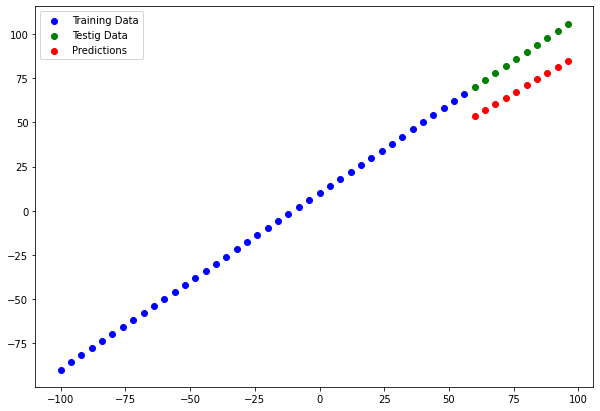

In [54]:
# Make a plot of predictions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [80]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build_model_2**

2 dense layers trained for 100 epochs

In [58]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2 compile the model

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]

)
model_2.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

In [59]:
# Make and plot predictions of model 2
y_preds_2 = model_2.predict(x_test)

1/1 [==============================] - 0s 94ms/step


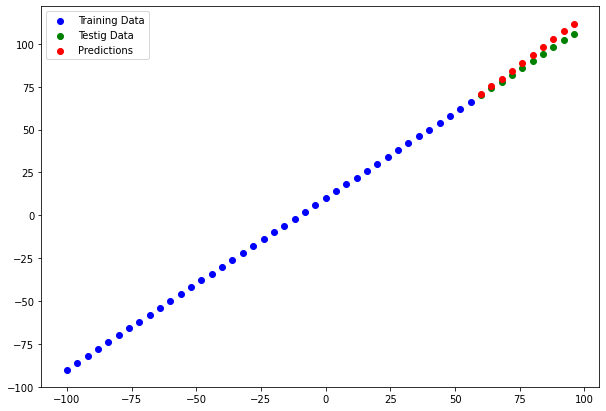

In [60]:
plot_predictions(predictions=y_preds_2)

In [61]:
# Calculate model_2 evaluation 
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)

In [63]:
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build_model_3**

 2 layers and trained for 500 epochs

In [75]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1)    
]
)
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_3.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=500)


Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 46ms/step


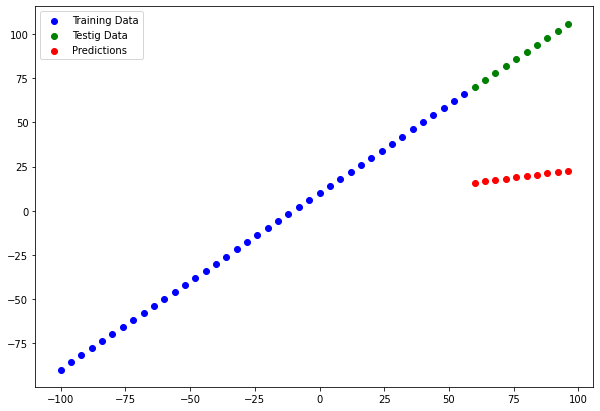

In [76]:
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [77]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)

In [78]:
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

In [83]:
# Lets create a pandas dataframe
import pandas as pd

model_results=[
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]
]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [84]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Traking your experiments

One good habit is to track the esults of your experiments.

And when doing so it can be tedious if you are running lots of experiments

luckily there are tools to help

* Tensor Board
* Weights and Biases

## Saving our models
 There are two formats in which we can save models
 1. The Save Model Format
 2. The HDF5 Format

In [85]:
# Save a model using the saved model format

model_2.save("best_model_saved_model_format")

In [86]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading our model and evaluating them

In [90]:
# Load in the saved model format model
loaded_saved_model_format = tf.keras.models.load_model("best_model_saved_model_format")
loaded_saved_model_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_saved_model_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 17ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [93]:
mae(y_true=y_test,y_preds=model_2_preds) == mae(y_true=y_test,y_preds=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [95]:
 # Load in model using the .HDF5 format
 loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
 loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Compare model_2 predictions with HDF5 model predictions
model_2_preds = model_2.predict(x_test)
loaded_h5_format_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 66ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])